In [82]:
# !pip install lazypredict
# !pip install imbalanced-learn
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 28.5 MB/s eta 0:00:00


In [44]:
from lazypredict.Supervised import LazyClassifier  # use LazyRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import pandas as pd


In [102]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
sample_df=pd.read_csv("/content/Sample_submission.csv")

In [3]:
Train_df=pd.read_csv("/content/Train.csv")

In [4]:
Test_df=pd.read_csv("/content/Test.csv")

In [5]:
Train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Test_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample_df.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [6]:
Train_df.shape

(1763, 1559)

In [8]:
## EDA

In [9]:
Train_df["Class"].value_counts()

,count
Class,
0,1620
1,143


In [10]:
Bool_cols=[ i for i in Train_df.columns.to_list() if Train_df[i].nunique()==2]

In [11]:
len(Bool_cols)

1520

In [12]:
Other_cols=set(Train_df.columns.to_list())-set(Bool_cols)

In [13]:
len(Other_cols)

39

In [ ]:
Train_df[list(Bool_cols)].sum()

,0
feature_4,1277
feature_5,5
feature_6,5
feature_7,14
feature_8,4
...,...
feature_1555,27
feature_1556,26
feature_1557,17
feature_1558,2


In [14]:
Train_df["feature_4"].nunique()

2

In [15]:
No_variance_column=[i for i in Other_cols if Train_df[i].nunique() ==1]

In [16]:
Train_df[list(No_variance_column)].sum()

,0
feature_1247,0
feature_435,0
feature_106,0
feature_1243,0
feature_320,0
feature_262,0
feature_652,0
feature_1185,0
feature_531,0
feature_1063,0


In [17]:
Train_df[list(Other_cols)].describe()

,feature_1247,feature_435,feature_106,feature_1243,feature_320,feature_262,feature_652,feature_1185,feature_531,feature_1063,...,feature_284,feature_578,feature_488,feature_495,feature_278,feature_894,feature_1038,feature_1096,feature_3,feature_553
count,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,...,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.0,1763.000000,1763.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.423940,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.566858,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001500,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.500000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,0.0


In [18]:
Valid_other_cols=set(Other_cols)-set(No_variance_column)

In [20]:
len(Valid_other_cols)

3

In [21]:
Train_df[list(Valid_other_cols)].corr()

,feature_2,feature_1,feature_3
feature_2,1.000000,0.360132,0.516664
feature_1,0.360132,1.000000,-0.214857
feature_3,0.516664,-0.214857,1.000000


In [22]:
bool_corr=Train_df[list(Bool_cols)].corr()

In [23]:
bool_corr

,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
feature_4,1.000000,0.032900,-0.014839,0.055194,0.029418,0.003878,0.069348,0.029418,-0.128442,0.032762,...,0.018765,0.029692,0.032900,-0.021605,0.038950,-0.005758,-0.008769,-0.004074,0.020790,0.020553
feature_5,0.032900,1.000000,-0.002844,-0.004771,-0.002543,-0.003601,-0.005995,-0.002543,-0.004226,-0.004226,...,-0.003367,-0.004028,-0.002844,-0.003367,-0.003367,-0.006651,-0.006525,-0.005262,-0.001797,-0.015845
feature_6,-0.014839,-0.002844,1.000000,-0.004771,-0.002543,-0.003601,-0.005995,-0.002543,-0.004226,-0.004226,...,-0.003367,-0.004028,-0.002844,-0.003367,-0.003367,-0.006651,-0.006525,-0.005262,-0.001797,-0.015845
feature_7,0.055194,-0.004771,-0.004771,1.000000,-0.004266,-0.006041,-0.010057,-0.004266,-0.007089,-0.007089,...,-0.005649,-0.006757,-0.004771,-0.005649,-0.005649,-0.011158,-0.010946,-0.008828,-0.003015,-0.026582
feature_8,0.029418,-0.002543,-0.002543,-0.004266,1.000000,-0.003220,-0.005361,-0.002274,-0.003779,-0.003779,...,-0.003011,-0.003602,-0.002543,-0.003011,-0.003011,-0.005947,-0.005834,-0.004705,-0.001607,-0.014168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_1555,-0.005758,-0.006651,-0.006651,-0.011158,-0.005947,-0.008420,0.069198,-0.005947,-0.009882,-0.009882,...,-0.007874,-0.009419,0.167062,-0.007874,-0.007874,1.000000,0.981024,0.507620,-0.004203,0.132136
feature_1556,-0.008769,-0.006525,-0.006525,-0.010946,-0.005834,-0.008260,0.028636,-0.005834,-0.009694,-0.009694,...,-0.007725,-0.009241,0.170446,-0.007725,-0.007725,0.981024,1.000000,0.517606,-0.004123,0.136012
feature_1557,-0.004074,-0.005262,-0.005262,-0.008828,-0.004705,-0.006662,0.041195,-0.004705,-0.007819,-0.007819,...,-0.006230,-0.007453,0.103885,-0.006230,-0.006230,0.507620,0.517606,1.000000,0.169104,0.076988
feature_1558,0.020790,-0.001797,-0.001797,-0.003015,-0.001607,-0.002275,0.148003,-0.001607,-0.002670,-0.002670,...,-0.002128,0.221826,-0.001797,-0.002128,-0.002128,-0.004203,-0.004123,0.169104,1.000000,-0.010013


In [24]:
import pandas as pd

def get_high_correlations(df, threshold=0.5):
    corr = df.corr()

    # Unstack and reset index
    corr_pairs = corr.unstack().reset_index()
    corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

    # Remove self-correlations
    corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

    # Remove duplicate pairs (A-B and B-A)
    corr_pairs['Sorted'] = corr_pairs.apply(lambda x: tuple(sorted([x['Feature1'], x['Feature2']])), axis=1)
    corr_pairs = corr_pairs.drop_duplicates('Sorted').drop(columns='Sorted')

    # Filter by threshold
    filtered = corr_pairs[(corr_pairs['Correlation'] > threshold) | (corr_pairs['Correlation'] < threshold*-1)]

    return filtered


In [25]:
bool_corr=get_high_correlations(df=Train_df[list(Bool_cols)], threshold=0.95)

In [26]:
dict1={}
related_feature=[]
for i in list(bool_corr.query("Correlation== 1").Feature1.unique()):
  if i not in related_feature:
    dict1[i]=list(bool_corr[bool_corr.Feature1==i].Feature2.unique())
    related_feature.extend(list(bool_corr[bool_corr.Feature1==i].Feature2.unique()))


In [27]:
len(dict1.keys())

241

In [28]:
len(dict1.keys())

241

In [29]:
len(bool_corr.query("Correlation== 1").Feature1.unique())-len(dict1.keys())

553

In [30]:
Co_related_columns=list(set(bool_corr.query("Correlation== 1").Feature1.unique())-set(dict1.keys()))

In [31]:
len(No_variance_column)

36

In [32]:
len(Co_related_columns+list(No_variance_column))

589

In [ ]:
No_variance_column,

In [33]:
Train_df.shape[1]-553-1-36-3 # valid Bool Columns

966

In [34]:
Train_df[["Class","feature_1"]].value_counts()

Class  feature_1
0      1            339
       60           108
       12            81
1      60            70
0      11            49
                   ... 
1      65             1
       80             1
       88             1
       135            1
       240            1
Name: count, Length: 215, dtype: int64

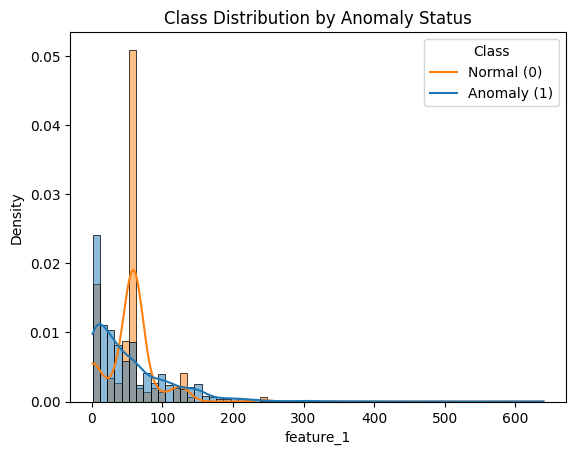

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: df['temperature'] is numeric, df['anomaly'] is 0 or 1
sns.histplot(data=Train_df, x='feature_1', hue='Class', kde=True, stat='density', common_norm=False)

plt.title("Class Distribution by Anomaly Status")
plt.xlabel("feature_1")
plt.ylabel("Density")
plt.legend(title='Class', labels=['Normal (0)', 'Anomaly (1)'])
plt.show()

/tmp/ipython-input-36-2060887851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Train_df, x='Class', y='feature_1', palette='Set2')


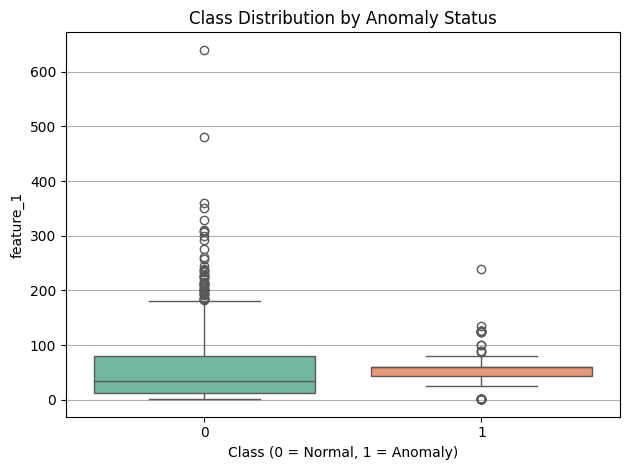

In [36]:
# Example: 'temperature' is numeric, 'anomaly' is binary (0 or 1)
sns.boxplot(data=Train_df, x='Class', y='feature_1', palette='Set2')

plt.title("Class Distribution by Anomaly Status")
plt.ylabel("feature_1")
plt.xlabel("Class (0 = Normal, 1 = Anomaly)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [37]:
# Feature Engineering (Remove or Modified Unwanted columns)

In [38]:
Train_dataset=Train_df.drop(columns=Co_related_columns+list(No_variance_column))

In [39]:
X=Train_dataset.drop(columns="Class")
y=Train_dataset["Class"]

In [43]:
# Split manually, if not already split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [59]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
display(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 114, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 1410, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080851 -> initscore=-2.430839
[LightGBM] [Info] Start training from score -2.430839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.90,0.79,0.79,0.91,0.21
NearestCentroid,0.90,0.76,0.76,0.91,0.13
ExtraTreeClassifier,0.88,0.68,0.68,0.89,0.09
BaggingClassifier,0.90,0.68,0.68,0.90,1.46
RandomForestClassifier,0.90,0.68,0.68,0.90,0.58
GaussianNB,0.78,0.66,0.66,0.82,0.09
ExtraTreesClassifier,0.88,0.65,0.65,0.88,0.78
XGBClassifier,0.90,0.64,0.64,0.89,0.45
DecisionTreeClassifier,0.89,0.64,0.64,0.89,0.24


In [ ]:
# prediction Model Fine tuning

In [60]:
def lazy_classifier_metrics_from_split(
    X_train, X_test, y_train, y_test, top_n=10, calculate_roc_auc=True
):
    """
    Evaluate top N LazyClassifier models with train/test metrics for binary classification.
    Checks only for NaNs in predicted probabilities.
    """

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    top_models = models.head(top_n)

    metrics = []

    for model_name in top_models.index:
        model = clf.models[model_name]
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        if calculate_roc_auc:
            try:
                y_train_proba = model.predict_proba(X_train)[:, 1]
                y_test_proba = model.predict_proba(X_test)[:, 1]

                if pd.isna(y_train_proba).any() or pd.isna(y_test_proba).any():
                    print(f"Warning: NaNs detected in predicted probabilities for model {model_name}")

                train_roc = roc_auc_score(y_train, y_train_proba)
                test_roc = roc_auc_score(y_test, y_test_proba)

            except (AttributeError, NotImplementedError, ValueError) as e:
                print(f"Warning: Could not compute ROC AUC for model {model_name}: {e}")
                train_roc = None
                test_roc = None
        else:
            train_roc = None
            test_roc = None

        metrics.append({
            "Model": model_name,
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Test F1 Score": f1_score(y_test, y_test_pred, zero_division=0),
            "Train F1 Score": f1_score(y_train, y_train_pred, zero_division=0),
            "Test Precision": precision_score(y_test, y_test_pred, zero_division=0),
            "Train Precision": precision_score(y_train, y_train_pred, zero_division=0),
            "Test Recall": recall_score(y_test, y_test_pred, zero_division=0),
            "Train Recall": recall_score(y_train, y_train_pred, zero_division=0),
            "Test ROC AUC": test_roc,
            "Train ROC AUC": train_roc
        })

    results_df = pd.DataFrame(metrics)[[
        "Model",
        "Test Accuracy", "Train Accuracy",
        "Test F1 Score", "Train F1 Score",
        "Test Precision", "Train Precision",
        "Test Recall", "Train Recall",
        "Test ROC AUC", "Train ROC AUC"
    ]]

    return results_df.round(4)

In [74]:
def lazy_classifier_metrics_from_split_standard_scaler(
    X_train, X_test, y_train, y_test, top_n=10, calculate_roc_auc=True
):
    """
    Evaluate top N LazyClassifier models with train/test metrics for binary classification.
    Checks only for NaNs in predicted probabilities.
    """
    scaler = StandardScaler()

    # Fit on train data only
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform test data
    X_test_scaled = scaler.transform(X_test)

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

    top_models = models.head(top_n)
    display(top_models)

    metrics = []

    for model_name in top_models.index:
        model = clf.models[model_name]
        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        if calculate_roc_auc:
            try:
                y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
                y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

                if pd.isna(y_train_proba).any() or pd.isna(y_test_proba).any():
                    print(f"Warning: NaNs detected in predicted probabilities for model {model_name}")

                train_roc = roc_auc_score(y_train, y_train_proba)
                test_roc = roc_auc_score(y_test, y_test_proba)

            except (AttributeError, NotImplementedError, ValueError) as e:
                print(f"Warning: Could not compute ROC AUC for model {model_name}: {e}")
                train_roc = None
                test_roc = None
        else:
            train_roc = None
            test_roc = None

        metrics.append({
            "Model": model_name,
            "Test Accuracy": accuracy_score(y_test, y_test_pred),
            "Train Accuracy": accuracy_score(y_train, y_train_pred),
            "Test F1 Score": f1_score(y_test, y_test_pred, zero_division=0),
            "Train F1 Score": f1_score(y_train, y_train_pred, zero_division=0),
            "Test Precision": precision_score(y_test, y_test_pred, zero_division=0),
            "Train Precision": precision_score(y_train, y_train_pred, zero_division=0),
            "Test Recall": recall_score(y_test, y_test_pred, zero_division=0),
            "Train Recall": recall_score(y_train, y_train_pred, zero_division=0),
            "Test ROC AUC": test_roc,
            "Train ROC AUC": train_roc
        })

    results_df = pd.DataFrame(metrics)[[
        "Model",
        "Test Accuracy", "Train Accuracy",
        "Test F1 Score", "Train F1 Score",
        "Test Precision", "Train Precision",
        "Test Recall", "Train Recall",
        "Test ROC AUC", "Train ROC AUC"
    ]]

    return results_df.round(4)

In [55]:
X_train.isna().sum().sum(),X_test.isna().sum().sum(),y_train.isna().sum().sum(),y_test.isna().sum().sum()

(np.int64(0), np.int64(0), np.int64(0), np.int64(0))

In [68]:
from sklearn.preprocessing import StandardScaler




In [61]:
# Get metrics
metrics_df_normal = lazy_classifier_metrics_from_split(X_train, X_test, y_train, y_test)
display(metrics_df_normal)



  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 114, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 1410, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080851 -> initscore=-2.430839
[LightGBM] [Info] Start training from score -2.430839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,BernoulliNB,0.90,0.92,0.53,0.59,0.44,0.52,0.66,0.68,0.87,0.93
1,NearestCentroid,0.90,0.93,0.50,0.60,0.44,0.56,0.59,0.66,0.87,0.95
2,ExtraTreeClassifier,0.88,1.00,0.38,0.97,0.33,1.00,0.45,0.95,0.68,1.00
3,BaggingClassifier,0.90,0.99,0.40,0.93,0.39,0.96,0.41,0.89,0.85,1.00
4,RandomForestClassifier,0.90,1.00,0.39,0.97,0.38,0.99,0.41,0.96,0.89,1.00
5,GaussianNB,0.78,0.83,0.28,0.48,0.19,0.32,0.52,1.00,0.66,0.91
6,ExtraTreesClassifier,0.88,1.00,0.34,0.97,0.31,1.00,0.38,0.95,0.78,1.00
7,XGBClassifier,0.90,0.99,0.35,0.90,0.36,0.95,0.34,0.86,0.90,1.00
8,DecisionTreeClassifier,0.89,1.00,0.34,0.97,0.33,1.00,0.34,0.95,0.66,1.00
9,AdaBoostClassifier,0.91,0.93,0.35,0.46,0.41,0.61,0.31,0.37,0.89,0.95


In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [63]:
# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Undersampling with RandomUnderSampler
under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)


In [64]:

# Run LazyPredict on SMOTE oversampled data
print("=== LazyClassifier with SMOTE (Oversampling) ===")
# Get metrics
metrics_df_smote = lazy_classifier_metrics_from_split(X_train_smote, X_test, y_train_smote, y_test)
display(metrics_df_smote)



=== LazyClassifier with SMOTE (Oversampling) ===


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1296, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 2592, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1296, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 2592, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,BernoulliNB,0.84,0.92,0.42,0.92,0.30,0.88,0.72,0.97,0.84,0.94
1,AdaBoostClassifier,0.85,0.79,0.42,0.77,0.31,0.88,0.66,0.68,0.84,0.90
2,NearestCentroid,0.83,0.92,0.39,0.92,0.28,0.88,0.66,0.97,0.83,0.95
3,RandomForestClassifier,0.82,1.00,0.35,1.00,0.25,0.99,0.59,1.00,0.84,1.00
4,KNeighborsClassifier,0.79,0.94,0.31,0.94,0.21,0.90,0.59,0.98,0.80,0.99
5,XGBClassifier,0.84,0.95,0.35,0.95,0.26,0.96,0.52,0.95,0.85,0.99
6,DecisionTreeClassifier,0.81,1.00,0.31,1.00,0.22,1.00,0.52,1.00,0.68,1.00
7,BaggingClassifier,0.81,0.99,0.29,0.99,0.21,0.99,0.48,0.99,0.83,1.00
8,GaussianNB,0.78,0.91,0.28,0.91,0.19,0.84,0.52,1.00,0.66,0.91
9,LGBMClassifier,0.83,0.95,0.30,0.95,0.23,0.96,0.45,0.95,0.85,0.99


In [65]:

# Run LazyPredict on Undersampled data
print("\n=== LazyClassifier with RandomUnderSampler ===")
metrics_df_under = lazy_classifier_metrics_from_split(X_train_under, X_test, y_train_under, y_test)
display(metrics_df_under)




=== LazyClassifier with RandomUnderSampler ===


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,LGBMClassifier,0.84,0.93,0.50,0.93,0.34,0.92,0.93,0.94,0.92,0.97
1,BaggingClassifier,0.84,0.99,0.49,0.99,0.33,1.00,0.90,0.97,0.90,1.00
2,XGBClassifier,0.82,0.97,0.44,0.97,0.30,0.98,0.90,0.96,0.91,1.00
3,RandomForestClassifier,0.87,1.00,0.49,1.00,0.37,1.00,0.76,1.00,0.90,1.00
4,DecisionTreeClassifier,0.78,1.00,0.39,1.00,0.25,1.00,0.86,1.00,0.82,1.00
5,AdaBoostClassifier,0.85,0.88,0.45,0.87,0.32,0.90,0.76,0.85,0.83,0.93
6,BernoulliNB,0.89,0.86,0.51,0.84,0.41,0.93,0.69,0.77,0.87,0.94
7,CalibratedClassifierCV,0.77,1.00,0.37,1.00,0.24,1.00,0.83,0.99,0.86,1.00
8,ExtraTreesClassifier,0.83,1.00,0.42,1.00,0.29,1.00,0.72,1.00,0.85,1.00
9,LinearSVC,0.74,1.00,0.34,1.00,0.21,1.00,0.83,1.00,NaN,NaN


In [75]:
# Get metrics
metrics_df_normal_scaled = lazy_classifier_metrics_from_split_standard_scaler(X_train, X_test, y_train, y_test)
display(metrics_df_normal_scaled)



  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 114, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 1410, number of used features: 133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080851 -> initscore=-2.430839
[LightGBM] [Info] Start training from score -2.430839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.90,0.79,0.79,0.91,0.09
NearestCentroid,0.90,0.76,0.76,0.91,0.13
ExtraTreeClassifier,0.88,0.68,0.68,0.89,0.06
BaggingClassifier,0.90,0.68,0.68,0.90,0.49
RandomForestClassifier,0.90,0.68,0.68,0.90,0.56
GaussianNB,0.78,0.66,0.66,0.82,0.07
ExtraTreesClassifier,0.88,0.65,0.65,0.88,0.74
XGBClassifier,0.90,0.64,0.64,0.89,0.46
DecisionTreeClassifier,0.89,0.64,0.64,0.89,0.14


,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,BernoulliNB,0.90,0.92,0.53,0.59,0.44,0.52,0.66,0.68,0.87,0.93
1,NearestCentroid,0.90,0.93,0.50,0.60,0.44,0.56,0.59,0.66,0.87,0.95
2,ExtraTreeClassifier,0.88,1.00,0.38,0.97,0.33,1.00,0.45,0.95,0.68,1.00
3,BaggingClassifier,0.90,0.99,0.40,0.93,0.39,0.96,0.41,0.89,0.85,1.00
4,RandomForestClassifier,0.90,1.00,0.39,0.97,0.38,0.99,0.41,0.96,0.89,1.00
5,GaussianNB,0.78,0.83,0.28,0.48,0.19,0.32,0.52,1.00,0.66,0.91
6,ExtraTreesClassifier,0.88,1.00,0.34,0.97,0.31,1.00,0.38,0.95,0.78,1.00
7,XGBClassifier,0.90,0.99,0.35,0.90,0.36,0.95,0.34,0.86,0.90,1.00
8,DecisionTreeClassifier,0.89,1.00,0.34,0.97,0.33,1.00,0.34,0.95,0.66,1.00
9,AdaBoostClassifier,0.91,0.93,0.35,0.46,0.41,0.61,0.31,0.37,0.89,0.95


In [76]:

# Run LazyPredict on SMOTE oversampled data
print("=== LazyClassifier with SMOTE Scaled (Oversampling) ===")
# Get metrics
metrics_df_smote_scaled = lazy_classifier_metrics_from_split_standard_scaler(X_train_smote, X_test, y_train_smote, y_test)
display(metrics_df_smote_scaled)



=== LazyClassifier with SMOTE Scaled (Oversampling) ===


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1296, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 2592, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.84,0.78,0.78,0.86,0.17
AdaBoostClassifier,0.85,0.76,0.76,0.88,1.73
NearestCentroid,0.83,0.75,0.75,0.86,0.15
RandomForestClassifier,0.82,0.71,0.71,0.85,0.89
KNeighborsClassifier,0.79,0.70,0.70,0.83,0.18
XGBClassifier,0.84,0.69,0.69,0.86,0.65
DecisionTreeClassifier,0.81,0.68,0.68,0.84,0.27
BaggingClassifier,0.81,0.66,0.66,0.84,0.84
GaussianNB,0.78,0.66,0.66,0.82,0.11


[LightGBM] [Info] Number of positive: 1296, number of negative: 1296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 2592, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,BernoulliNB,0.84,0.92,0.42,0.92,0.30,0.88,0.72,0.97,0.84,0.94
1,AdaBoostClassifier,0.85,0.79,0.42,0.77,0.31,0.88,0.66,0.68,0.84,0.90
2,NearestCentroid,0.83,0.92,0.39,0.92,0.28,0.88,0.66,0.97,0.83,0.95
3,RandomForestClassifier,0.82,1.00,0.35,1.00,0.25,0.99,0.59,1.00,0.84,1.00
4,KNeighborsClassifier,0.79,0.94,0.31,0.94,0.21,0.90,0.59,0.98,0.80,0.99
5,XGBClassifier,0.84,0.95,0.35,0.95,0.26,0.96,0.52,0.95,0.85,0.99
6,DecisionTreeClassifier,0.81,1.00,0.31,1.00,0.22,1.00,0.52,1.00,0.68,1.00
7,BaggingClassifier,0.81,0.99,0.29,0.99,0.21,0.99,0.48,0.99,0.83,1.00
8,GaussianNB,0.78,0.91,0.28,0.91,0.19,0.84,0.52,1.00,0.66,0.91
9,LGBMClassifier,0.83,0.95,0.30,0.95,0.23,0.96,0.45,0.95,0.85,0.99


In [77]:

# Run LazyPredict on Undersampled data
print("\n=== LazyClassifier with Scaled RandomUnderSampler ===")
metrics_df_under_scaled = lazy_classifier_metrics_from_split_standard_scaler(X_train_under, X_test, y_train_under, y_test)
display(metrics_df_under_scaled)




=== LazyClassifier with Scaled RandomUnderSampler ===


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.84,0.88,0.88,0.87,0.06
BaggingClassifier,0.84,0.87,0.87,0.87,0.17
XGBClassifier,0.82,0.85,0.85,0.85,0.19
RandomForestClassifier,0.87,0.82,0.82,0.89,0.29
DecisionTreeClassifier,0.78,0.82,0.82,0.83,0.06
AdaBoostClassifier,0.85,0.81,0.81,0.87,0.35
BernoulliNB,0.89,0.80,0.80,0.90,0.06
CalibratedClassifierCV,0.77,0.79,0.79,0.82,0.62
ExtraTreesClassifier,0.83,0.78,0.78,0.86,0.37


[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

,Model,Test Accuracy,Train Accuracy,Test F1 Score,Train F1 Score,Test Precision,Train Precision,Test Recall,Train Recall,Test ROC AUC,Train ROC AUC
0,LGBMClassifier,0.84,0.93,0.50,0.93,0.34,0.92,0.93,0.94,0.92,0.97
1,BaggingClassifier,0.84,0.99,0.49,0.99,0.33,1.00,0.90,0.97,0.90,1.00
2,XGBClassifier,0.82,0.97,0.44,0.97,0.30,0.98,0.90,0.96,0.91,1.00
3,RandomForestClassifier,0.87,1.00,0.49,1.00,0.37,1.00,0.76,1.00,0.90,1.00
4,DecisionTreeClassifier,0.78,1.00,0.39,1.00,0.25,1.00,0.86,1.00,0.82,1.00
5,AdaBoostClassifier,0.85,0.88,0.45,0.87,0.32,0.90,0.76,0.85,0.83,0.93
6,BernoulliNB,0.89,0.86,0.51,0.84,0.41,0.93,0.69,0.77,0.87,0.94
7,CalibratedClassifierCV,0.77,1.00,0.37,1.00,0.24,1.00,0.83,0.99,0.86,1.00
8,ExtraTreesClassifier,0.83,1.00,0.42,1.00,0.29,1.00,0.72,1.00,0.85,1.00
9,LinearSVC,0.74,1.00,0.34,1.00,0.21,1.00,0.83,1.00,NaN,NaN


In [101]:
def tune_adaboost(X, y, cv=5):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0),
        }
        model = AdaBoostClassifier(**params)
        return cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)
    return AdaBoostClassifier(**study.best_params)

def tune_bernoulli_nb(X, y, cv=5):
    def objective(trial):
        params = {
            "alpha": trial.suggest_float("alpha", 0.0, 1.0),
            "binarize": trial.suggest_float("binarize", 0.0, 1.0)
        }
        model = BernoulliNB(**params)
        return cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)
    return BernoulliNB(**study.best_params)

def tune_xgb(X, y, cv=5):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0)
        }
        model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", **params)
        return cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20)
    return XGBClassifier(use_label_encoder=False, eval_metric="logloss", **study.best_params)

def tune_nearest_centroid(X, y, cv=5):
    def objective(trial):
        params = {
            "metric": trial.suggest_categorical("metric", ["euclidean", "manhattan"]),
        }
        model = NearestCentroid(**params)
        return cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=10)
    return NearestCentroid(**study.best_params)


def tune_random_forest(X, y, cv=5, n_trials=20):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 2, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
            "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        }

        model = RandomForestClassifier(**params, random_state=42)
        score = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return RandomForestClassifier(**study.best_params, random_state=42)


In [86]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n--- {model_name} TRAIN ---")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))

    print(f"\n--- {model_name} TEST ---")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))


In [87]:
# AdaBoost
ada_model = tune_adaboost(X_train, y_train)
evaluate_model(ada_model, X_train, y_train, X_test, y_test, "AdaBoost")

[I 2025-07-20 06:33:44,073] A new study created in memory with name: no-name-39e1ae1a-a995-4641-b28a-1dcd5f137313
[I 2025-07-20 06:33:47,067] Trial 0 finished with value: 0.924822695035461 and parameters: {'n_estimators': 80, 'learning_rate': 0.5486018886525801}. Best is trial 0 with value: 0.924822695035461.
[I 2025-07-20 06:33:50,955] Trial 1 finished with value: 0.9184397163120567 and parameters: {'n_estimators': 93, 'learning_rate': 0.29868468357936395}. Best is trial 0 with value: 0.924822695035461.
[I 2025-07-20 06:33:56,624] Trial 2 finished with value: 0.924113475177305 and parameters: {'n_estimators': 135, 'learning_rate': 0.9667165806904353}. Best is trial 0 with value: 0.924822695035461.
[I 2025-07-20 06:34:04,010] Trial 3 finished with value: 0.9212765957446809 and parameters: {'n_estimators': 183, 'learning_rate': 0.49090521545549826}. Best is trial 0 with value: 0.924822695035461.
[I 2025-07-20 06:34:11,258] Trial 4 finished with value: 0.9141843971631205 and parameters: 


--- AdaBoost TRAIN ---
[[1269   27]
 [  72   42]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1296
           1       0.61      0.37      0.46       114

    accuracy                           0.93      1410
   macro avg       0.78      0.67      0.71      1410
weighted avg       0.92      0.93      0.92      1410


--- AdaBoost TEST ---
[[311  13]
 [ 21   8]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       324
           1       0.38      0.28      0.32        29

    accuracy                           0.90       353
   macro avg       0.66      0.62      0.63       353
weighted avg       0.89      0.90      0.90       353



In [90]:
# AdaBoost
ada_model = tune_adaboost(X_train_smote, y_train_smote)
evaluate_model(ada_model, X_train_smote, y_train_smote, X_test, y_test, "AdaBoost")

[I 2025-07-20 06:40:08,171] A new study created in memory with name: no-name-3fa02805-4344-4a68-ac05-28f8c46e7b07
[I 2025-07-20 06:40:26,147] Trial 0 finished with value: 0.7905096673882801 and parameters: {'n_estimators': 228, 'learning_rate': 0.27703828727014024}. Best is trial 0 with value: 0.7905096673882801.
[I 2025-07-20 06:40:37,531] Trial 1 finished with value: 0.8067117489082808 and parameters: {'n_estimators': 172, 'learning_rate': 0.6646512562507696}. Best is trial 1 with value: 0.8067117489082808.
[I 2025-07-20 06:40:44,184] Trial 2 finished with value: 0.7932116261596031 and parameters: {'n_estimators': 92, 'learning_rate': 0.7740299568832315}. Best is trial 1 with value: 0.8067117489082808.
[I 2025-07-20 06:40:56,683] Trial 3 finished with value: 0.8094129637482238 and parameters: {'n_estimators': 185, 'learning_rate': 0.7226200499094675}. Best is trial 3 with value: 0.8094129637482238.
[I 2025-07-20 06:41:11,541] Trial 4 finished with value: 0.7889652658438786 and parame


--- AdaBoost TRAIN ---
[[1186  110]
 [ 302  994]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1296
           1       0.90      0.77      0.83      1296

    accuracy                           0.84      2592
   macro avg       0.85      0.84      0.84      2592
weighted avg       0.85      0.84      0.84      2592


--- AdaBoost TEST ---
[[282  42]
 [ 10  19]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       324
           1       0.31      0.66      0.42        29

    accuracy                           0.85       353
   macro avg       0.64      0.76      0.67       353
weighted avg       0.91      0.85      0.88       353



In [91]:
# AdaBoost
ada_model = tune_adaboost(X_train_under, y_train_under)
evaluate_model(ada_model, X_train_under, y_train_under, X_test, y_test, "AdaBoost")

[I 2025-07-20 06:46:25,266] A new study created in memory with name: no-name-497ef22c-b39a-47f5-bcff-1a6d046925f8
[I 2025-07-20 06:46:27,748] Trial 0 finished with value: 0.802512077294686 and parameters: {'n_estimators': 70, 'learning_rate': 0.30675521491700386}. Best is trial 0 with value: 0.802512077294686.
[I 2025-07-20 06:46:31,814] Trial 1 finished with value: 0.8071497584541063 and parameters: {'n_estimators': 171, 'learning_rate': 0.4701738844536456}. Best is trial 1 with value: 0.8071497584541063.
[I 2025-07-20 06:46:32,963] Trial 2 finished with value: 0.7850241545893719 and parameters: {'n_estimators': 53, 'learning_rate': 0.21122450586198388}. Best is trial 1 with value: 0.8071497584541063.
[I 2025-07-20 06:46:38,070] Trial 3 finished with value: 0.8248309178743961 and parameters: {'n_estimators': 267, 'learning_rate': 0.9485274364257507}. Best is trial 3 with value: 0.8248309178743961.
[I 2025-07-20 06:46:40,302] Trial 4 finished with value: 0.8157487922705314 and paramete


--- AdaBoost TRAIN ---
[[102  12]
 [ 17  97]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       114
           1       0.89      0.85      0.87       114

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228


--- AdaBoost TEST ---
[[288  36]
 [  7  22]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       324
           1       0.38      0.76      0.51        29

    accuracy                           0.88       353
   macro avg       0.68      0.82      0.72       353
weighted avg       0.93      0.88      0.90       353



In [92]:


# BernoulliNB
bnb_model = tune_bernoulli_nb(X_train, y_train)
evaluate_model(bnb_model, X_train, y_train, X_test, y_test, "BernoulliNB")


[I 2025-07-20 06:49:10,617] A new study created in memory with name: no-name-ae433459-0c0a-435b-a629-415f488b6bd6
[I 2025-07-20 06:49:10,969] Trial 0 finished with value: 0.9163120567375888 and parameters: {'alpha': 0.23773512144520292, 'binarize': 0.6838310924183727}. Best is trial 0 with value: 0.9163120567375888.
[I 2025-07-20 06:49:11,294] Trial 1 finished with value: 0.9198581560283688 and parameters: {'alpha': 0.8642425864548172, 'binarize': 0.3965859392600316}. Best is trial 1 with value: 0.9198581560283688.
[I 2025-07-20 06:49:11,696] Trial 2 finished with value: 0.9177304964539008 and parameters: {'alpha': 0.44636514230715885, 'binarize': 0.05158776480167415}. Best is trial 1 with value: 0.9198581560283688.
[I 2025-07-20 06:49:12,208] Trial 3 finished with value: 0.9198581560283688 and parameters: {'alpha': 0.9347541963055269, 'binarize': 0.0016033608480704453}. Best is trial 1 with value: 0.9198581560283688.
[I 2025-07-20 06:49:12,850] Trial 4 finished with value: 0.919858156


--- BernoulliNB TRAIN ---
[[1224   72]
 [  29   85]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1296
           1       0.54      0.75      0.63       114

    accuracy                           0.93      1410
   macro avg       0.76      0.85      0.79      1410
weighted avg       0.94      0.93      0.93      1410


--- BernoulliNB TEST ---
[[300  24]
 [ 10  19]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       324
           1       0.44      0.66      0.53        29

    accuracy                           0.90       353
   macro avg       0.70      0.79      0.74       353
weighted avg       0.92      0.90      0.91       353



In [93]:


# BernoulliNB
bnb_model = tune_bernoulli_nb(X_train_smote, y_train_smote)
evaluate_model(bnb_model, X_train_smote, y_train_smote, X_test, y_test, "BernoulliNB")


[I 2025-07-20 06:49:51,804] A new study created in memory with name: no-name-b267ae75-032e-46ab-8816-63fa876174cb
[I 2025-07-20 06:49:53,710] Trial 0 finished with value: 0.9031780748543754 and parameters: {'alpha': 0.30225354673456006, 'binarize': 0.5940755757187022}. Best is trial 0 with value: 0.9031780748543754.
[I 2025-07-20 06:49:54,981] Trial 1 finished with value: 0.8935270530646253 and parameters: {'alpha': 0.6537928503905627, 'binarize': 0.9215338405013938}. Best is trial 0 with value: 0.9031780748543754.
[I 2025-07-20 06:49:56,953] Trial 2 finished with value: 0.8935270530646253 and parameters: {'alpha': 0.6754276780757766, 'binarize': 0.9485845287442058}. Best is trial 0 with value: 0.9031780748543754.
[I 2025-07-20 06:49:59,020] Trial 3 finished with value: 0.893912409519346 and parameters: {'alpha': 0.6213425412711067, 'binarize': 0.9328320099977948}. Best is trial 0 with value: 0.9031780748543754.
[I 2025-07-20 06:49:59,977] Trial 4 finished with value: 0.900090015696952


--- BernoulliNB TRAIN ---
[[1126  170]
 [  32 1264]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1296
           1       0.88      0.98      0.93      1296

    accuracy                           0.92      2592
   macro avg       0.93      0.92      0.92      2592
weighted avg       0.93      0.92      0.92      2592


--- BernoulliNB TEST ---
[[275  49]
 [ 11  18]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       324
           1       0.27      0.62      0.38        29

    accuracy                           0.83       353
   macro avg       0.62      0.73      0.64       353
weighted avg       0.90      0.83      0.86       353



In [94]:


# BernoulliNB
bnb_model = tune_bernoulli_nb(X_train_under, y_train_under)
evaluate_model(bnb_model, X_train_under, y_train_under, X_test, y_test, "BernoulliNB")


[I 2025-07-20 07:01:32,080] A new study created in memory with name: no-name-4d672167-7e55-417b-8303-76c4e6b3c396
[I 2025-07-20 07:01:32,992] Trial 0 finished with value: 0.8332367149758454 and parameters: {'alpha': 0.546162981031415, 'binarize': 0.8822948265185847}. Best is trial 0 with value: 0.8332367149758454.
[I 2025-07-20 07:01:33,716] Trial 1 finished with value: 0.8333333333333334 and parameters: {'alpha': 0.6377014740307055, 'binarize': 0.9893529178411541}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-07-20 07:01:34,742] Trial 2 finished with value: 0.8246376811594203 and parameters: {'alpha': 0.790231407993285, 'binarize': 0.0017249584346291646}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-07-20 07:01:35,722] Trial 3 finished with value: 0.8332367149758454 and parameters: {'alpha': 0.484958817043203, 'binarize': 0.6196033334388513}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-07-20 07:01:36,624] Trial 4 finished with value: 0.855265700483091


--- BernoulliNB TRAIN ---
[[107   7]
 [ 18  96]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       114
           1       0.93      0.84      0.88       114

    accuracy                           0.89       228
   macro avg       0.89      0.89      0.89       228
weighted avg       0.89      0.89      0.89       228


--- BernoulliNB TEST ---
[[283  41]
 [ 10  19]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       324
           1       0.32      0.66      0.43        29

    accuracy                           0.86       353
   macro avg       0.64      0.76      0.67       353
weighted avg       0.91      0.86      0.88       353



In [95]:


# XGBoost
xgb_model = tune_xgb(X_train, y_train)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost")

[I 2025-07-20 07:12:33,692] A new study created in memory with name: no-name-c468f761-21ff-40d1-bda6-fe3c0b86ef2a
[I 2025-07-20 07:12:44,651] Trial 0 finished with value: 0.9212765957446809 and parameters: {'n_estimators': 275, 'max_depth': 6, 'learning_rate': 0.13811563115867126, 'subsample': 0.6618219581291811}. Best is trial 0 with value: 0.9212765957446809.
[I 2025-07-20 07:12:54,970] Trial 1 finished with value: 0.9184397163120567 and parameters: {'n_estimators': 215, 'max_depth': 10, 'learning_rate': 0.2674199057907135, 'subsample': 0.937643631228311}. Best is trial 0 with value: 0.9212765957446809.
[I 2025-07-20 07:13:01,452] Trial 2 finished with value: 0.922695035460993 and parameters: {'n_estimators': 161, 'max_depth': 4, 'learning_rate': 0.2648033078889334, 'subsample': 0.6607701104292756}. Best is trial 2 with value: 0.922695035460993.
[I 2025-07-20 07:13:10,202] Trial 3 finished with value: 0.925531914893617 and parameters: {'n_estimators': 243, 'max_depth': 2, 'learning_r


--- XGBoost TRAIN ---
[[1283   13]
 [  32   82]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1296
           1       0.86      0.72      0.78       114

    accuracy                           0.97      1410
   macro avg       0.92      0.85      0.88      1410
weighted avg       0.97      0.97      0.97      1410


--- XGBoost TEST ---
[[309  15]
 [ 20   9]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       324
           1       0.38      0.31      0.34        29

    accuracy                           0.90       353
   macro avg       0.66      0.63      0.64       353
weighted avg       0.89      0.90      0.90       353



In [96]:


# XGBoost
xgb_model = tune_xgb(X_train_smote, y_train_smote)
evaluate_model(xgb_model, X_train_smote, y_train_smote, X_test, y_test, "XGBoost")

[I 2025-07-20 07:16:50,959] A new study created in memory with name: no-name-6a1de293-1d79-47e4-afd8-85435841b45e
[I 2025-07-20 07:17:10,587] Trial 0 finished with value: 0.9070331272643412 and parameters: {'n_estimators': 75, 'max_depth': 10, 'learning_rate': 0.2416233867707203, 'subsample': 0.554193200227423}. Best is trial 0 with value: 0.9070331272643412.
[I 2025-07-20 07:17:17,650] Trial 1 finished with value: 0.9089621413320834 and parameters: {'n_estimators': 114, 'max_depth': 7, 'learning_rate': 0.17330947767878796, 'subsample': 0.9773483021185776}. Best is trial 1 with value: 0.9089621413320834.
[I 2025-07-20 07:17:31,225] Trial 2 finished with value: 0.9085782727401226 and parameters: {'n_estimators': 257, 'max_depth': 7, 'learning_rate': 0.27779199948746963, 'subsample': 0.9471095607245007}. Best is trial 1 with value: 0.9089621413320834.
[I 2025-07-20 07:17:40,871] Trial 3 finished with value: 0.9054931893082182 and parameters: {'n_estimators': 131, 'max_depth': 7, 'learnin


--- XGBoost TRAIN ---
[[1238   58]
 [  10 1286]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1296
           1       0.96      0.99      0.97      1296

    accuracy                           0.97      2592
   macro avg       0.97      0.97      0.97      2592
weighted avg       0.97      0.97      0.97      2592


--- XGBoost TEST ---
[[287  37]
 [ 13  16]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       324
           1       0.30      0.55      0.39        29

    accuracy                           0.86       353
   macro avg       0.63      0.72      0.66       353
weighted avg       0.90      0.86      0.88       353



In [97]:


# XGBoost
xgb_model = tune_xgb(X_train_under, y_train_under)
evaluate_model(xgb_model, X_train_under, y_train_under, X_test, y_test, "XGBoost")

[I 2025-07-20 07:22:24,960] A new study created in memory with name: no-name-3997575a-a1e9-4b46-be4a-df1929895ff8
[I 2025-07-20 07:22:37,544] Trial 0 finished with value: 0.7632850241545894 and parameters: {'n_estimators': 299, 'max_depth': 9, 'learning_rate': 0.2936848455806091, 'subsample': 0.8272881081094399}. Best is trial 0 with value: 0.7632850241545894.
[I 2025-07-20 07:22:42,031] Trial 1 finished with value: 0.8247342995169081 and parameters: {'n_estimators': 105, 'max_depth': 3, 'learning_rate': 0.08123218317767758, 'subsample': 0.9997709346254181}. Best is trial 1 with value: 0.8247342995169081.
[I 2025-07-20 07:22:46,661] Trial 2 finished with value: 0.8201932367149759 and parameters: {'n_estimators': 86, 'max_depth': 7, 'learning_rate': 0.22736822967354584, 'subsample': 0.7986684807241051}. Best is trial 1 with value: 0.8247342995169081.
[I 2025-07-20 07:22:54,519] Trial 3 finished with value: 0.8248309178743961 and parameters: {'n_estimators': 220, 'max_depth': 10, 'learni


--- XGBoost TRAIN ---
[[106   8]
 [ 16  98]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       114
           1       0.92      0.86      0.89       114

    accuracy                           0.89       228
   macro avg       0.90      0.89      0.89       228
weighted avg       0.90      0.89      0.89       228


--- XGBoost TEST ---
[[284  40]
 [  6  23]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       324
           1       0.37      0.79      0.50        29

    accuracy                           0.87       353
   macro avg       0.67      0.83      0.71       353
weighted avg       0.93      0.87      0.89       353



In [98]:


# Nearest Centroid
nc_model = tune_nearest_centroid(X_train, y_train)
evaluate_model(nc_model, X_train, y_train, X_test, y_test, "NearestCentroid")


[I 2025-07-20 07:43:36,205] A new study created in memory with name: no-name-05320ded-bbad-4443-a3ca-d14c44cff148
[I 2025-07-20 07:43:36,408] Trial 0 finished with value: 0.8070921985815603 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.8070921985815603.
[I 2025-07-20 07:43:36,647] Trial 1 finished with value: 0.7652482269503545 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.8070921985815603.
[I 2025-07-20 07:43:36,932] Trial 2 finished with value: 0.7652482269503545 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.8070921985815603.
[I 2025-07-20 07:43:37,240] Trial 3 finished with value: 0.8070921985815603 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.8070921985815603.
[I 2025-07-20 07:43:37,604] Trial 4 finished with value: 0.7652482269503545 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.8070921985815603.
[I 2025-07-20 07:43:37,887] Trial 5 finished with value: 0.76


--- NearestCentroid TRAIN ---
[[1077  219]
 [  49   65]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1296
           1       0.23      0.57      0.33       114

    accuracy                           0.81      1410
   macro avg       0.59      0.70      0.61      1410
weighted avg       0.90      0.81      0.84      1410


--- NearestCentroid TEST ---
[[262  62]
 [  8  21]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       324
           1       0.25      0.72      0.38        29

    accuracy                           0.80       353
   macro avg       0.61      0.77      0.63       353
weighted avg       0.91      0.80      0.84       353



In [99]:


# Nearest Centroid
nc_model = tune_nearest_centroid(X_train_smote, y_train_smote)
evaluate_model(nc_model, X_train_smote, y_train_smote, X_test, y_test, "NearestCentroid")


[I 2025-07-20 07:44:11,651] A new study created in memory with name: no-name-0e1ef1eb-e72b-4f4b-ac00-77e59e1aa256
[I 2025-07-20 07:44:12,975] Trial 0 finished with value: 0.720287008726315 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 07:44:15,478] Trial 1 finished with value: 0.720287008726315 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 07:44:16,870] Trial 2 finished with value: 0.6982963971403278 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 07:44:17,568] Trial 3 finished with value: 0.6982963971403278 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 07:44:18,422] Trial 4 finished with value: 0.6982963971403278 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 07:44:19,077] Trial 5 finished with value: 0.698296397


--- NearestCentroid TRAIN ---
[[1080  216]
 [ 510  786]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1296
           1       0.78      0.61      0.68      1296

    accuracy                           0.72      2592
   macro avg       0.73      0.72      0.72      2592
weighted avg       0.73      0.72      0.72      2592


--- NearestCentroid TEST ---
[[265  59]
 [  8  21]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       324
           1       0.26      0.72      0.39        29

    accuracy                           0.81       353
   macro avg       0.62      0.77      0.64       353
weighted avg       0.91      0.81      0.85       353



In [100]:


# Nearest Centroid
nc_model = tune_nearest_centroid(X_train_under, y_train_under)
evaluate_model(nc_model, X_train_under, y_train_under, X_test, y_test, "NearestCentroid")


[I 2025-07-20 07:45:09,096] A new study created in memory with name: no-name-a6651148-3e1c-4921-a3c7-be7663d3dc51
[I 2025-07-20 07:45:09,832] Trial 0 finished with value: 0.6669565217391303 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.6669565217391303.
[I 2025-07-20 07:45:10,790] Trial 1 finished with value: 0.6843478260869564 and parameters: {'metric': 'euclidean'}. Best is trial 1 with value: 0.6843478260869564.
[I 2025-07-20 07:45:11,453] Trial 2 finished with value: 0.6843478260869564 and parameters: {'metric': 'euclidean'}. Best is trial 1 with value: 0.6843478260869564.
[I 2025-07-20 07:45:12,101] Trial 3 finished with value: 0.6669565217391303 and parameters: {'metric': 'manhattan'}. Best is trial 1 with value: 0.6843478260869564.
[I 2025-07-20 07:45:12,858] Trial 4 finished with value: 0.6669565217391303 and parameters: {'metric': 'manhattan'}. Best is trial 1 with value: 0.6843478260869564.
[I 2025-07-20 07:45:14,603] Trial 5 finished with value: 0.66


--- NearestCentroid TRAIN ---
[[91 23]
 [49 65]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       114
           1       0.74      0.57      0.64       114

    accuracy                           0.68       228
   macro avg       0.69      0.68      0.68       228
weighted avg       0.69      0.68      0.68       228


--- NearestCentroid TEST ---
[[259  65]
 [  8  21]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       324
           1       0.24      0.72      0.37        29

    accuracy                           0.79       353
   macro avg       0.61      0.76      0.62       353
weighted avg       0.91      0.79      0.83       353



In [103]:
rf_model = tune_random_forest(X_train, y_train)
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")


[I 2025-07-20 07:50:00,880] A new study created in memory with name: no-name-f57b2989-7f31-45ce-b0ce-20cdeadd1915
[I 2025-07-20 07:50:44,659] Trial 0 finished with value: 0.9156028368794326 and parameters: {'n_estimators': 157, 'max_depth': 28, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.9156028368794326.
[I 2025-07-20 07:50:46,978] Trial 1 finished with value: 0.9191489361702129 and parameters: {'n_estimators': 278, 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.9191489361702129.
[I 2025-07-20 07:51:04,407] Trial 2 finished with value: 0.9212765957446807 and parameters: {'n_estimators': 143, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.9212765957446807.
[I 2025-07-20 07:51:06,476] Trial 3 finished with value: 0.9191489361702129 an


--- Random Forest TRAIN ---
[[1284   12]
 [  34   80]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1296
           1       0.87      0.70      0.78       114

    accuracy                           0.97      1410
   macro avg       0.92      0.85      0.88      1410
weighted avg       0.97      0.97      0.97      1410


--- Random Forest TEST ---
[[306  18]
 [ 20   9]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       324
           1       0.33      0.31      0.32        29

    accuracy                           0.89       353
   macro avg       0.64      0.63      0.63       353
weighted avg       0.89      0.89      0.89       353



In [104]:
rf_model = tune_random_forest(X_train_smote, y_train_smote)
evaluate_model(rf_model, X_train_smote, y_train_smote, X_test, y_test, "Random Forest")


[I 2025-07-20 08:00:00,299] A new study created in memory with name: no-name-d475a701-5af6-4947-8049-638eeff930f7
[I 2025-07-20 08:00:09,381] Trial 0 finished with value: 0.7935954947515641 and parameters: {'n_estimators': 461, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.7935954947515641.
[I 2025-07-20 08:00:13,948] Trial 1 finished with value: 0.8009247067050536 and parameters: {'n_estimators': 280, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.8009247067050536.
[I 2025-07-20 08:00:21,426] Trial 2 finished with value: 0.7966805781834683 and parameters: {'n_estimators': 382, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.8009247067050536.
[I 2025-07-20 08:00:25,020] Trial 3 finished with value: 0.8070963614316217


--- Random Forest TRAIN ---
[[1251   45]
 [   5 1291]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1296
           1       0.97      1.00      0.98      1296

    accuracy                           0.98      2592
   macro avg       0.98      0.98      0.98      2592
weighted avg       0.98      0.98      0.98      2592


--- Random Forest TEST ---
[[268  56]
 [ 15  14]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       324
           1       0.20      0.48      0.28        29

    accuracy                           0.80       353
   macro avg       0.57      0.65      0.58       353
weighted avg       0.89      0.80      0.83       353



In [105]:
rf_model = tune_random_forest(X_train_under, y_train_under)
evaluate_model(rf_model, X_train_under, y_train_under, X_test, y_test, "Random Forest")


[I 2025-07-20 08:10:28,096] A new study created in memory with name: no-name-74a82287-89ae-42be-a70f-01817a8c3d7b
[I 2025-07-20 08:10:32,260] Trial 0 finished with value: 0.7457004830917875 and parameters: {'n_estimators': 356, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 18, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.7457004830917875.
[I 2025-07-20 08:10:38,409] Trial 1 finished with value: 0.7938164251207729 and parameters: {'n_estimators': 368, 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.7938164251207729.
[I 2025-07-20 08:10:40,076] Trial 2 finished with value: 0.7104347826086956 and parameters: {'n_estimators': 263, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.7938164251207729.
[I 2025-07-20 08:10:42,145] Trial 3 finished with value: 0.758550724637681


--- Random Forest TRAIN ---
[[107   7]
 [  5 109]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       114
           1       0.94      0.96      0.95       114

    accuracy                           0.95       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.95      0.95      0.95       228


--- Random Forest TEST ---
[[287  37]
 [  6  23]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       324
           1       0.38      0.79      0.52        29

    accuracy                           0.88       353
   macro avg       0.68      0.84      0.72       353
weighted avg       0.93      0.88      0.90       353



In [117]:


# Nearest Centroid
nc_model = tune_nearest_centroid(X_train_smote, y_train_smote)
evaluate_model(nc_model, X_train_smote, y_train_smote, X_test, y_test, "NearestCentroid")


[I 2025-07-20 08:52:29,287] A new study created in memory with name: no-name-df6a1b8a-37eb-4a62-9dd8-8ad31759a1d2
[I 2025-07-20 08:52:30,932] Trial 0 finished with value: 0.720287008726315 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 08:52:32,321] Trial 1 finished with value: 0.6982963971403278 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 08:52:34,402] Trial 2 finished with value: 0.720287008726315 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 08:52:37,190] Trial 3 finished with value: 0.720287008726315 and parameters: {'metric': 'euclidean'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 08:52:39,001] Trial 4 finished with value: 0.6982963971403278 and parameters: {'metric': 'manhattan'}. Best is trial 0 with value: 0.720287008726315.
[I 2025-07-20 08:52:40,615] Trial 5 finished with value: 0.7202870087


--- NearestCentroid TRAIN ---
[[1080  216]
 [ 510  786]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1296
           1       0.78      0.61      0.68      1296

    accuracy                           0.72      2592
   macro avg       0.73      0.72      0.72      2592
weighted avg       0.73      0.72      0.72      2592


--- NearestCentroid TEST ---
[[265  59]
 [  8  21]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       324
           1       0.26      0.72      0.39        29

    accuracy                           0.81       353
   macro avg       0.62      0.77      0.64       353
weighted avg       0.91      0.81      0.85       353



In [111]:
# Get the centroids
centroids = nc_model.centroids_

# Calculate mean absolute difference between centroids across classes for each feature
importance = np.mean(np.abs(np.diff(centroids, axis=0)), axis=0)

# Display with feature names
import pandas as pd
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)


In [116]:
# Top 10 features
print(feature_importance[:10])

feature_21     3.81
feature_27     3.67
feature_182    3.52
feature_1346   3.52
feature_1225   3.40
feature_628    3.40
feature_1485   3.40
feature_1409   3.40
feature_479    3.34
feature_156    3.34
dtype: float64


In [122]:
Y_test=nc_model.predict(Test_df[list(X_train_smote.columns.to_list())])

In [124]:
sample_df.value_counts()

,count
Class,
0.00,756


In [125]:
sample_df["Class"]=Y_test

In [126]:
sample_df.value_counts()

,count
Class,
0,590
1,166


In [127]:
sample_df.to_csv("/content/submission.csv",index=False)